In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydataset
import seaborn as sns


from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer

from sklearn.model_selection import train_test_split
from scipy import stats as stats
from scipy.stats import pearsonr, spearmanr

from itertools import combinations


import warnings
warnings.filterwarnings("ignore")

import acquire as aq
import prepare as prep
import explore as ex

## Acquire Data
1. As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process.

2. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [2]:
zillow = aq.get_zillow_data()

In [3]:
train, validate, test = prep.prep_zillow(zillow)

In [4]:
train.shape, validate.shape, test.shape

((1012244, 7), (433820, 7), (361516, 7))

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1012244 entries, 1443537 to 603901
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   bathrooms   1012244 non-null  float64
 1   bedrooms    1012244 non-null  float64
 2   sqft        1012244 non-null  float64
 3   year_built  1012244 non-null  float64
 4   tax_amount  1012244 non-null  float64
 5   tax_value   1012244 non-null  float64
 6   fips        1012244 non-null  object 
dtypes: float64(6), object(1)
memory usage: 61.8+ MB


### Acquisition Takeaways:
- fips being the number of counties in California seem to be the only true initial categorical type variables. 
- Perhaps bedrooms, bathrooms, and year_built can be seen as distinct/discrete variables. 

# Visualize the data

#### 3.　Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

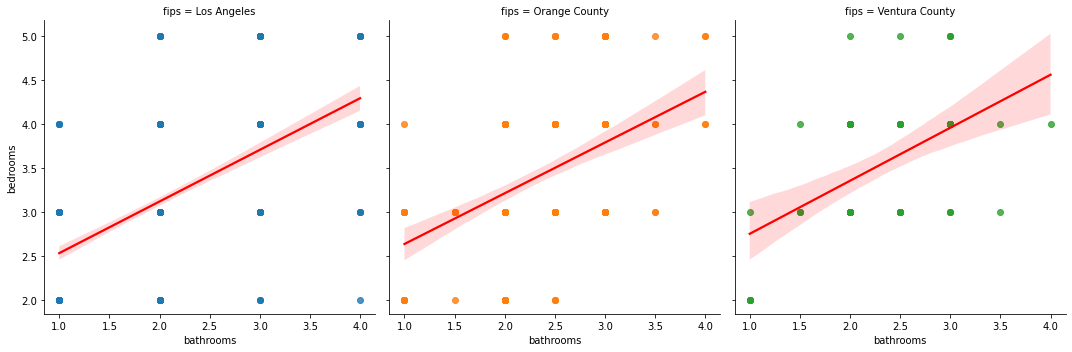

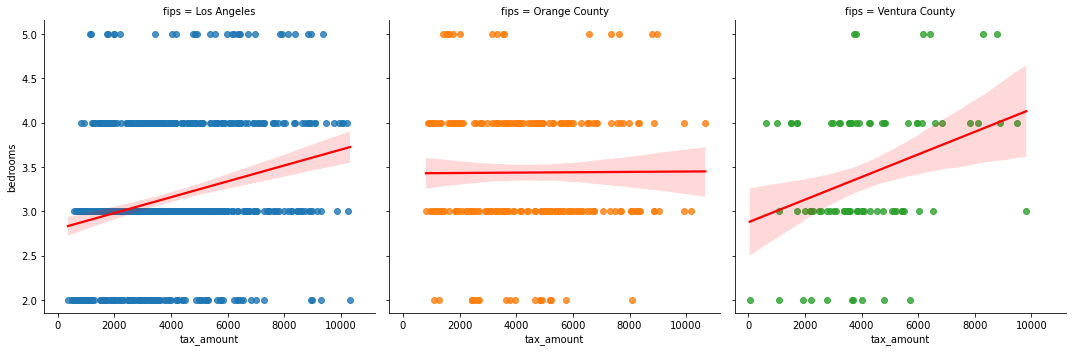

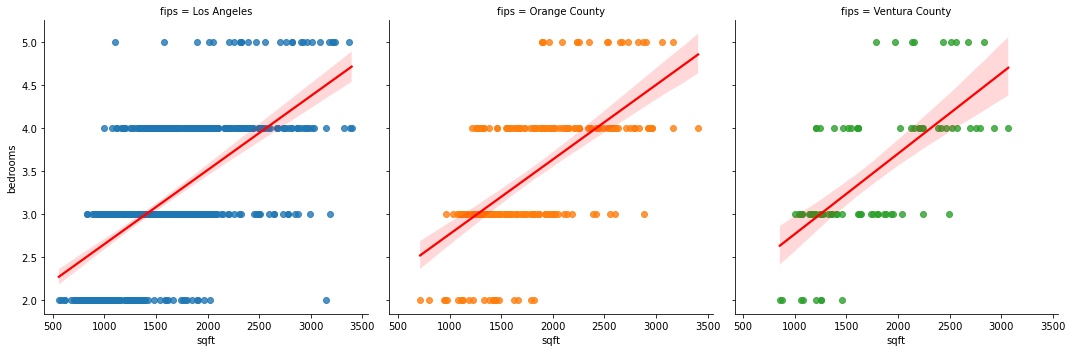

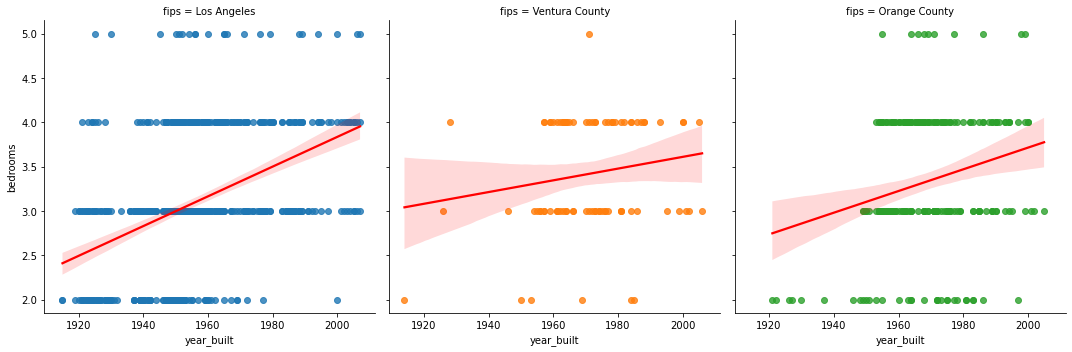

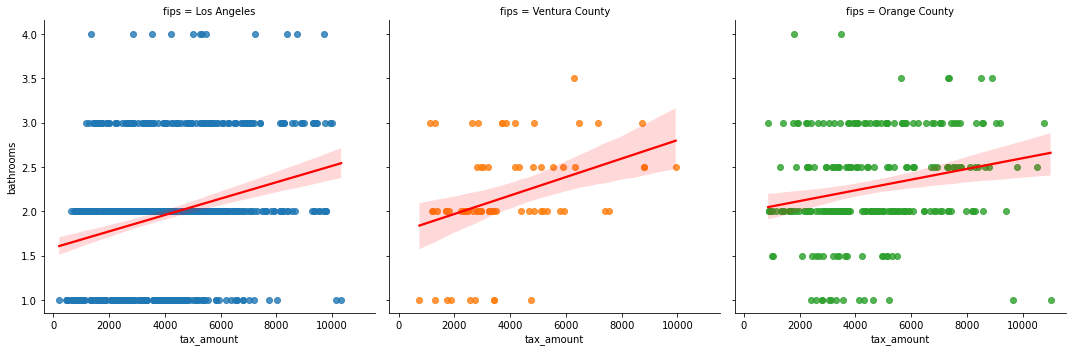

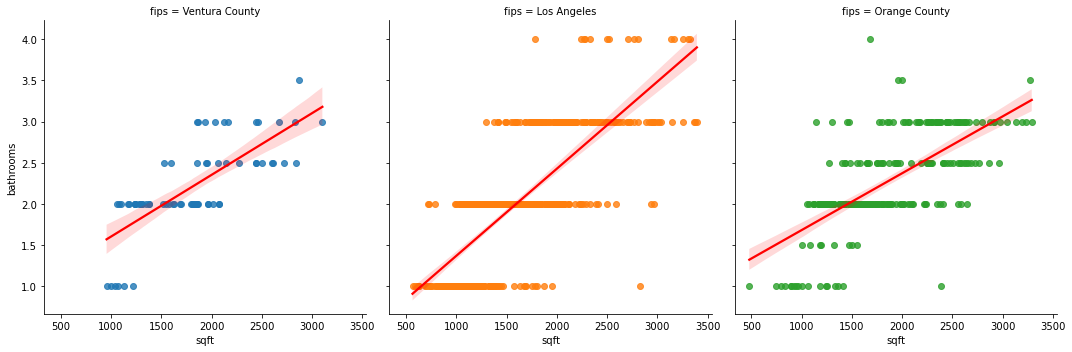

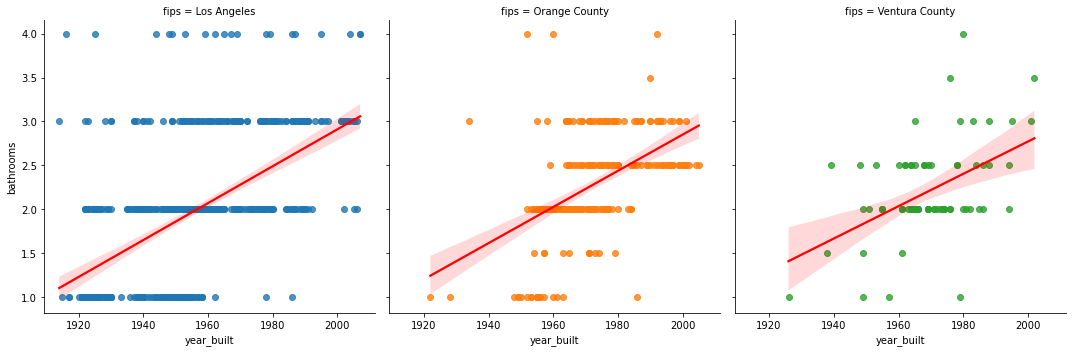

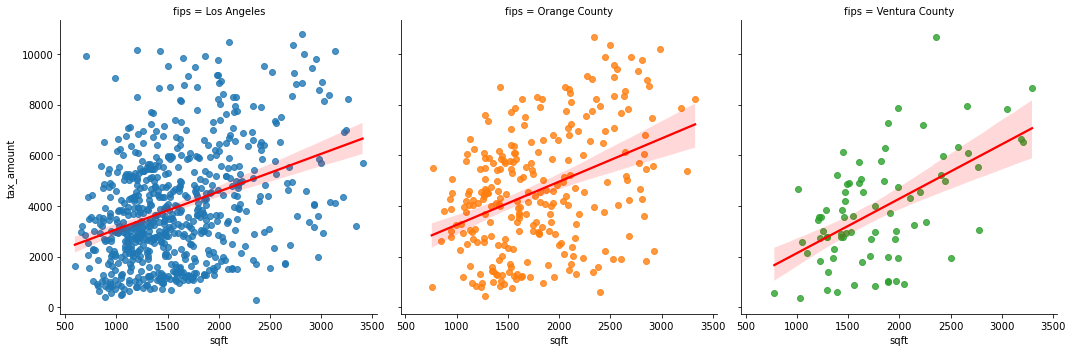

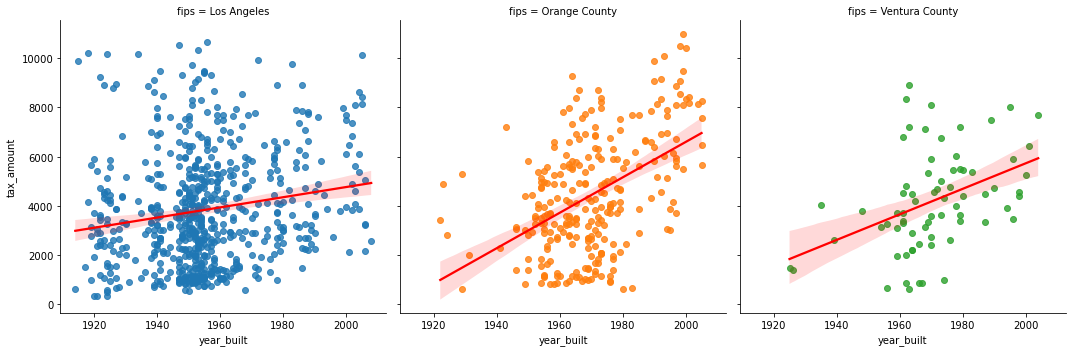

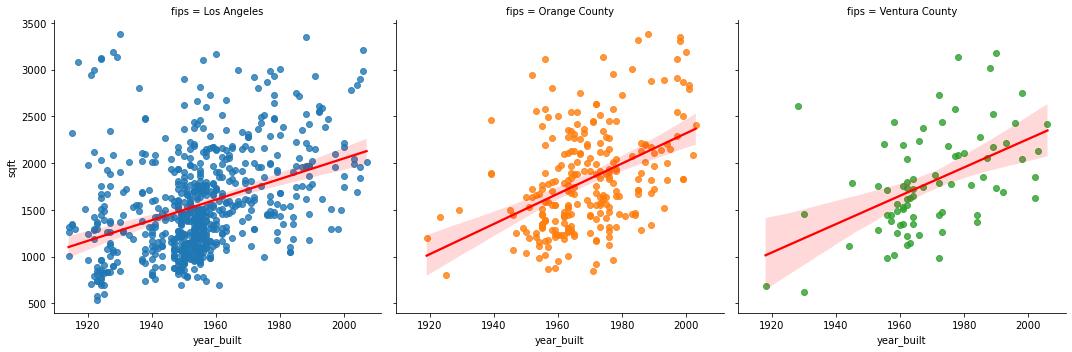

In [9]:
ex.plot_variable_pairs(train)

### Plot variable pairs Takeaways:
- Again, looking at some of these potentially discrete variables, there might be some advantage in changing them from continuous

#### 4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

<Figure size 720x936 with 0 Axes>

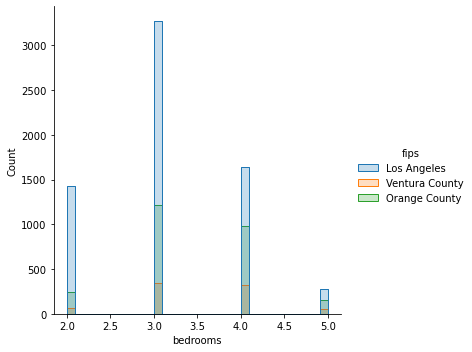

<Figure size 720x936 with 0 Axes>

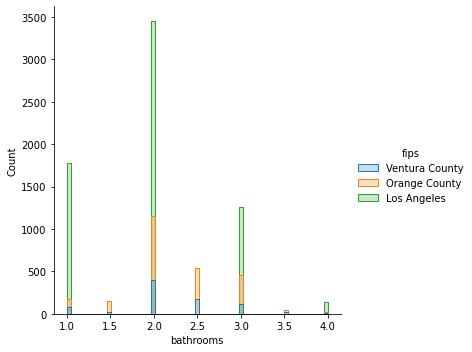

<Figure size 720x936 with 0 Axes>

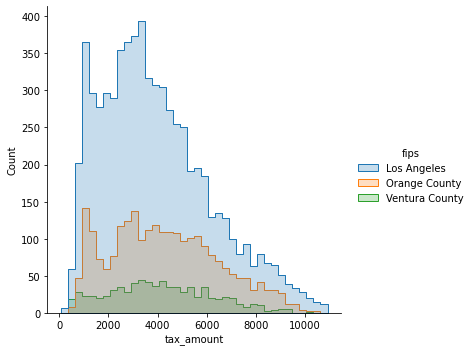

<Figure size 720x936 with 0 Axes>

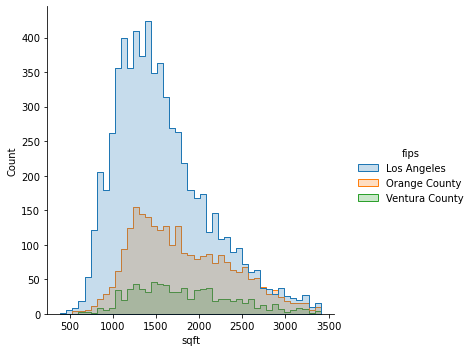

<Figure size 720x936 with 0 Axes>

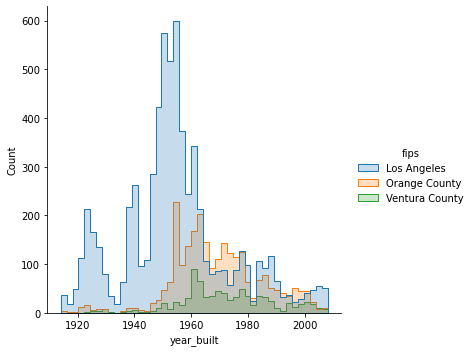

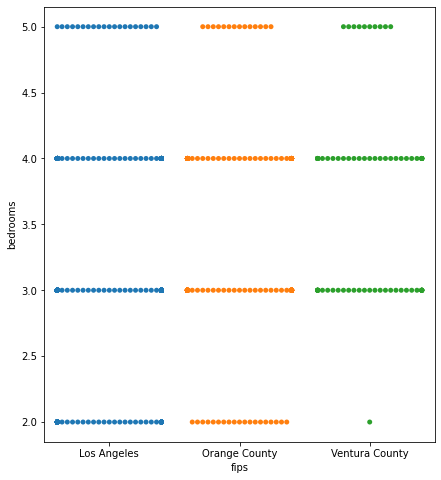

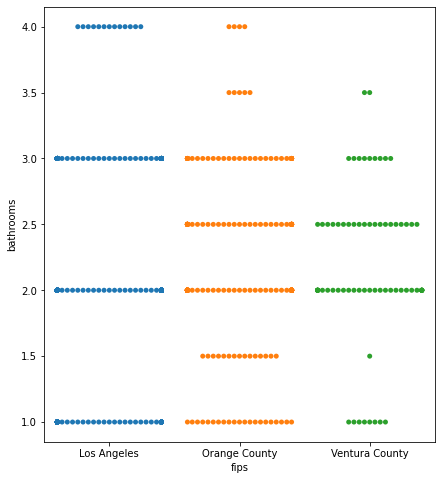

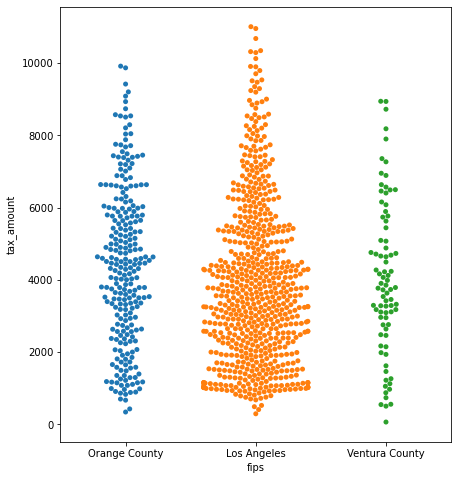

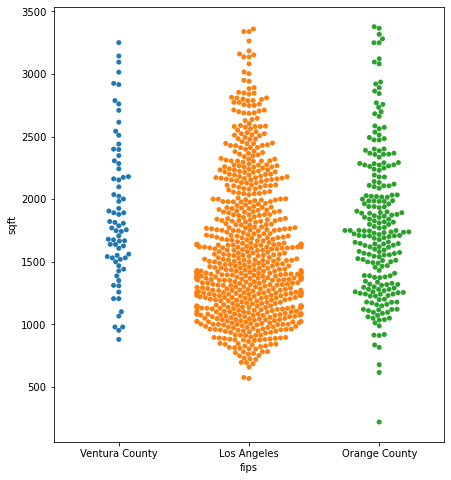

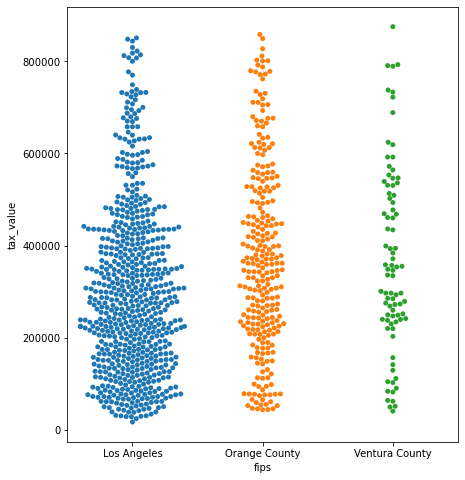

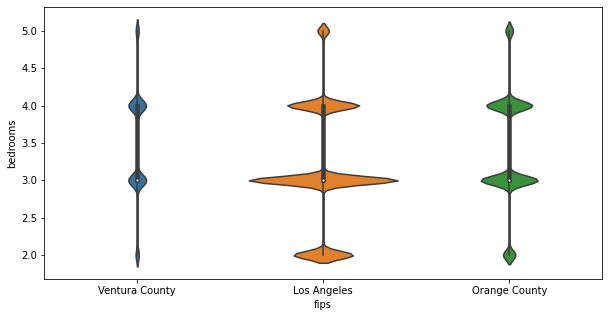

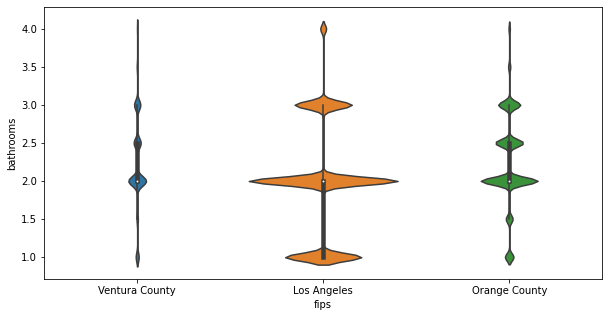

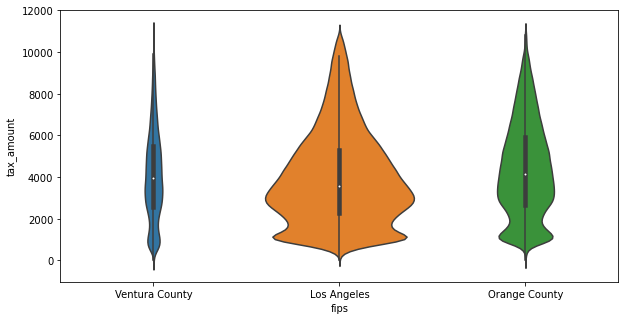

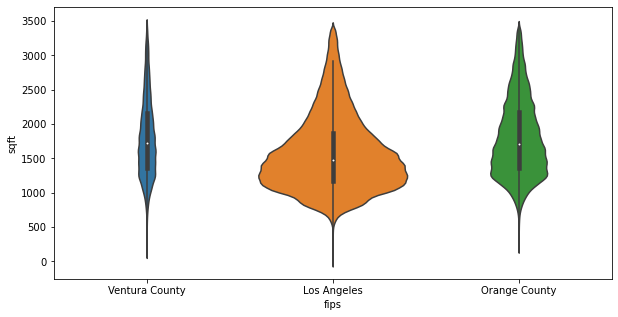

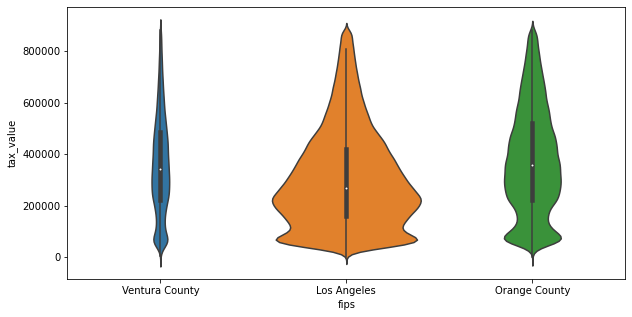

In [10]:
ex.plot_categorical_and_continuous_vars(train)

### 5. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

### 6. Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

In [26]:
# Since my variables are not normally distributed, I might choose Spearman instead.

zillow_spearman = train.drop(columns=['fips']).corr(method='spearman')

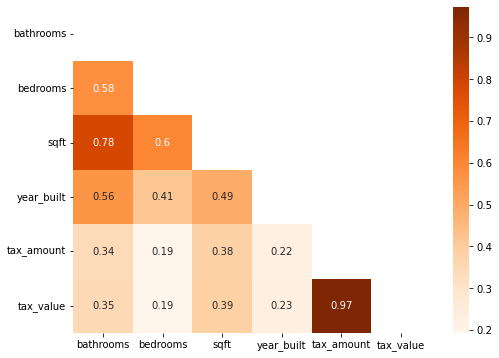

In [27]:
plt.figure(figsize=(8,6))
sns.heatmap(zillow_spearman, cmap='Oranges', annot=True,
            mask=np.triu(zillow_spearman))
plt.show()

#### Heatmap takeaways:
- The highest positive correlation with the target variable, tax_value, is sqft. 

- Let's check each of them

### Spearman R Test

In [32]:
r, p_value = spearmanr(train.sqft, train.tax_value)
print(f'Correlation between Coefficient: {r}\nP-value: {p_value}')

Correlation between Coefficient: 0.3876508231652733
P-value: 0.0


In [37]:
alpha = .05
outputs = []

for col in train.columns:
    r, p_value = spearmanr(train[col], train.tax_value)
    output = {'columns': f"{col} and Tax Value",
              'r': f"{r}", 
              'p_value': f"{p_value}",
              "reject_null": p_value < alpha
             }
    outputs.append(output)
    
stat_test = pd.DataFrame(outputs)
stat_test

,columns,r,p_value,reject_null
0,bathrooms and Tax Value,0.3459316868583789,0.0,True
1,bedrooms and Tax Value,0.19363956157567172,0.0,True
2,sqft and Tax Value,0.3876508231652733,0.0,True
3,year_built and Tax Value,0.23200411697781767,0.0,True
4,tax_amount and Tax Value,0.9732101622215644,0.0,True
5,tax_value and Tax Value,0.9999999999999998,0.0,True
6,fips and Tax Value,0.15891940216800346,0.0,True


### T-Test

T-Test on SQFT and Tax Value

In [42]:
print(train.sqft.var()), print(train.tax_value.var())

316051.8369589949
38836187801.056984


(None, None)

In [44]:
t, p = stats.ttest_ind(train.tax_value, train.sqft, equal_var=False)
t, p / 2

(1664.6203721530712, 0.0)

In [45]:
print("is p/2 < alpha? ", p / 2 < alpha)
print("is t > 0? ", t > 0)

is p/2 < alpha?  True
is t > 0?  True


In [46]:
if p / 2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

We reject $H_{0}$
